In [1]:
import gc

# Force garbage collection between experiments
def cleanup_memory():
    gc.collect()
    
print("Memory management configured")

Memory management configured


In [4]:
df = pd.read_csv(r'C:\Users\marco\Desktop\Thesis\backbone creation\raid_sample_medium_PostPOS_CLEAN.csv')

print(f"Dataset shape: {df.shape}")
print(f"Class distribution: {df['is_ai'].value_counts().to_dict()}")

# Verify you have all expected columns
expected_features = [
    'smog_index', 'automated_readability_index',
    'unigram_diversity', 'trigram_diversity', 'hapax_type_ratio', 'yules_k', 'mtld',
    'trigram_entropy', 'token_burstiness', 'char_trigram_entropy',
    'avg_tree_depth', 'max_tree_depth', 'avg_dependency_distance', 'right_dependency_ratio',
    'uppercase_ratio', 'whitespace_ratio', 'unique_char_count', 'bits_per_char',
    'comma_ratio', 'period_ratio', 'question_ratio', 'exclamation_ratio', 
    'semicolon_ratio', 'colon_ratio', 'quote_ratio',
    'sentiment_polarity', 'sentiment_subjectivity', 'sentiment_polarity_variance',
    'neutral_sentence_ratio', 'positive_word_ratio', 'negative_word_ratio',
    'pos_ratio_DET', 'pos_ratio_ADP', 'pos_ratio_AUX', 'pos_ratio_CCONJ',
    'pos_ratio_PART', 'pos_ratio_NUM', 'pos_row_entropy_weighted',
    'function_to_content_rate', 'noun_verb_alternation_rate', 'content_function_ratio',
    'noun_verb_ratio', 'adj_adv_ratio', 'verbs_per_100_tok', 'nouns_per_100_tok',
    'adj_per_100_tok', 'adv_per_100_tok', 'pron_per_100_tok', 'punct_per_100_tok',
    'tokens_per_sentence_mean', 'mean_nouns_per_sent', 'mean_verbs_per_sent',
    'mean_adjs_per_sent', 'mean_advs_per_sent', 'prop_sents_with_verb',
    'unique_upos_per_sent_mean', 'max_runlen_NOUN', 'max_runlen_PUNCT',
    'avg_sentence_length', 'sentence_length_std', 'n_tokens_doc', 'n_sentences_doc', 'type_token_ratio'
]

# Check which features are available
available_features = [f for f in expected_features if f in df.columns]
missing_features = [f for f in expected_features if f not in df.columns]

print(f"\nAvailable features: {len(available_features)}")
if missing_features:
    print(f"Missing features: {missing_features}")

Dataset shape: (12000, 86)
Class distribution: {True: 6000, False: 6000}

Available features: 53
Missing features: ['smog_index', 'automated_readability_index', 'unigram_diversity', 'hapax_type_ratio', 'mtld', 'trigram_entropy', 'right_dependency_ratio', 'bits_per_char', 'n_tokens_doc', 'type_token_ratio']


In [4]:
feature_groups = {
    'readability': [
        'smog_index', 
        'automated_readability_index'
    ],
    
    'lexical_diversity': [
        'unigram_diversity', 
        'trigram_diversity', 
        'hapax_type_ratio', 
        'yules_k', 
        'mtld'
    ],
    
    'ngram_patterns': [
        'trigram_entropy', 
        'token_burstiness', 
        'char_trigram_entropy'
    ],
    
    'syntactic': [
        'avg_tree_depth', 
        'max_tree_depth', 
        'avg_dependency_distance', 
        'right_dependency_ratio'
    ],
    
    'character_level': [
        'uppercase_ratio', 
        'whitespace_ratio', 
        'unique_char_count', 
        'bits_per_char'
    ],
    
    'punctuation': [
        'comma_ratio', 
        'period_ratio', 
        'question_ratio',
        'exclamation_ratio', 
        'semicolon_ratio', 
        'colon_ratio', 
        'quote_ratio'
    ],
    
    'sentiment': [
        'sentiment_polarity', 
        'sentiment_subjectivity',
        'sentiment_polarity_variance', 
        'neutral_sentence_ratio',
        'positive_word_ratio', 
        'negative_word_ratio'
    ],
    
    'pos_ratios': [
        'pos_ratio_DET', 
        'pos_ratio_ADP', 
        'pos_ratio_AUX',
        'pos_ratio_CCONJ', 
        'pos_ratio_PART', 
        'pos_ratio_NUM',
        'pos_row_entropy_weighted'
    ],
    
    'pos_derived': [
        'function_to_content_rate', 
        'noun_verb_alternation_rate',
        'content_function_ratio', 
        'noun_verb_ratio', 
        'adj_adv_ratio', 
        'verbs_per_100_tok', 
        'nouns_per_100_tok',
        'adj_per_100_tok', 
        'adv_per_100_tok', 
        'pron_per_100_tok',
        'punct_per_100_tok', 
        'mean_nouns_per_sent', 
        'mean_verbs_per_sent',
        'mean_adjs_per_sent', 
        'mean_advs_per_sent',
        'unique_upos_per_sent_mean',
        'max_runlen_NOUN', 
        'max_runlen_PUNCT'
    ],
    
    'sentence_stats': [
        'avg_sentence_length', 
        'sentence_length_std',
        'tokens_per_sentence_mean', 
        'prop_sents_with_verb'
    ],
    
    'document_level': [
        'n_tokens_doc', 
        'n_sentences_doc'
    ]
}

# Filter to only available features
feature_groups = {
    name: [f for f in features if f in available_features]
    for name, features in feature_groups.items()
}

# Remove empty groups
feature_groups = {k: v for k, v in feature_groups.items() if v}

print("Feature Groups:")
for group_name, features in feature_groups.items():
    print(f"  {group_name}: {len(features)} features")

# Flatten all features for use
all_features = [f for features in feature_groups.values() for f in features]
print(f"\nTotal features: {len(all_features)}")

Feature Groups:
  lexical_diversity: 2 features
  ngram_patterns: 2 features
  syntactic: 3 features
  character_level: 3 features
  punctuation: 7 features
  sentiment: 6 features
  pos_ratios: 7 features
  pos_derived: 18 features
  sentence_stats: 4 features
  document_level: 1 features

Total features: 53


In [5]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df[all_features].copy()
y = df['is_ai'].copy()

# Stratified split - preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=RANDOM_STATE
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTrain class distribution: {y_train.value_counts().to_dict()}")
print(f"Test class distribution: {y_test.value_counts().to_dict()}")

# Setup CV splitter for ablation experiments
cv_splitter = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE)

print(f"\nCross-validation: {N_FOLDS}-fold stratified")
print("Test set reserved - will only be used for final validation")

Training set: 9600 samples
Test set: 2400 samples

Train class distribution: {False: 4800, True: 4800}
Test class distribution: {False: 1200, True: 1200}

Cross-validation: 3-fold stratified
Test set reserved - will only be used for final validation


In [6]:
def cross_validate_features(X_train, y_train, features, cv_splitter, rf_params, 
                           fast_mode=False):
    """
    Perform cross-validation with specified features.
    
    Args:
        fast_mode: If True, use fewer trees for speed (RFE iterations)
    
    Returns:
        dict with mean and std for f1, precision, recall, roc_auc
    """
    # Select features
    X_subset = X_train[features]
    
    # Use faster params if in fast_mode
    params = RF_PARAMS_FAST if fast_mode else rf_params
    
    # Create model
    model = RandomForestClassifier(**params)
    
    # Cross-validate
    scoring = ['f1', 'roc_auc']  # Only essential metrics for speed
    cv_results = cross_validate(
        model, X_subset, y_train,
        cv=cv_splitter,
        scoring=scoring,
        return_train_score=False,
        n_jobs=-1,
        verbose=0
    )
    
    # Aggregate results
    results = {
        'f1_mean': cv_results['test_f1'].mean(),
        'f1_std': cv_results['test_f1'].std(),
        'roc_auc_mean': cv_results['test_roc_auc'].mean(),
        'roc_auc_std': cv_results['test_roc_auc'].std(),
        'n_features': len(features)
    }
    
    return results

print("Helper function defined: cross_validate_features()")
print("Includes fast_mode for RFE iterations")


Helper function defined: cross_validate_features()
Includes fast_mode for RFE iterations


In [7]:
print("="*60)
print("BASELINE: Training with all features")
print("="*60)

baseline_results = cross_validate_features(
    X_train, y_train, 
    all_features, 
    cv_splitter, 
    RF_PARAMS,
    fast_mode=False  # Use full model for baseline
)

print(f"\nBaseline Performance ({len(all_features)} features):")
print(f"  F1:        {baseline_results['f1_mean']:.4f} ± {baseline_results['f1_std']:.4f}")
print(f"  ROC-AUC:   {baseline_results['roc_auc_mean']:.4f} ± {baseline_results['roc_auc_std']:.4f}")

# Store for comparison
baseline_f1 = baseline_results['f1_mean']

# Get detailed metrics from a single train/test split for precision/recall
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import precision_score, recall_score

X_temp_train, X_temp_val, y_temp_train, y_temp_val = tts(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=RANDOM_STATE
)

rf_baseline = RandomForestClassifier(**RF_PARAMS)
rf_baseline.fit(X_temp_train[all_features], y_temp_train)
y_pred_temp = rf_baseline.predict(X_temp_val[all_features])

precision = precision_score(y_temp_val, y_pred_temp)
recall = recall_score(y_temp_val, y_pred_temp)

print(f"  Precision: {precision:.4f} (single validation split)")
print(f"  Recall:    {recall:.4f} (single validation split)")

# Get feature importances for ranking
feature_importances = pd.DataFrame({
    'feature': all_features,
    'importance': rf_baseline.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importances.head(10).to_string(index=False))

BASELINE: Training with all features

Baseline Performance (53 features):
  F1:        0.8355 ± 0.0066
  ROC-AUC:   0.9211 ± 0.0033
  Precision: 0.8800 (single validation split)
  Recall:    0.7948 (single validation split)

Top 10 Most Important Features:
                 feature  importance
                 yules_k    0.110609
     sentence_length_std    0.082590
        token_burstiness    0.063844
       trigram_diversity    0.060204
pos_row_entropy_weighted    0.039556
    char_trigram_entropy    0.033435
             comma_ratio    0.025818
         n_sentences_doc    0.022788
           pos_ratio_NUM    0.021961
       punct_per_100_tok    0.021570


In [8]:
print("\n" + "="*60)
print("EXPERIMENT 1: HIERARCHICAL ABLATION")
print("Testing importance of each feature group")
print("="*60)

hierarchical_results = {}

for group_name, group_features in feature_groups.items():
    print(f"\nTesting without '{group_name}' ({len(group_features)} features)...")
    
    # Get features excluding this group
    remaining_features = [f for f in all_features if f not in group_features]
    
    # Cross-validate
    results = cross_validate_features(
        X_train, y_train,
        remaining_features,
        cv_splitter,
        RF_PARAMS
    )
    
    # Calculate drop from baseline
    f1_drop = baseline_f1 - results['f1_mean']
    f1_drop_pct = (f1_drop / baseline_f1) * 100
    
    hierarchical_results[group_name] = {
        'f1_mean': results['f1_mean'],
        'f1_std': results['f1_std'],
        'f1_drop': f1_drop,
        'f1_drop_pct': f1_drop_pct,
        'n_features': len(group_features),
        'features': group_features
    }
    
    print(f"  F1: {results['f1_mean']:.4f} (drop: {f1_drop:.4f}, {f1_drop_pct:.1f}%)")

# Sort by importance
sorted_groups = sorted(
    hierarchical_results.items(),
    key=lambda x: x[1]['f1_drop'],
    reverse=True
)

print("\n" + "-"*60)
print("GROUP IMPORTANCE RANKING:")
print("-"*60)
for i, (group_name, metrics) in enumerate(sorted_groups, 1):
    print(f"{i}. {group_name:20s} | Drop: {metrics['f1_drop']:.4f} ({metrics['f1_drop_pct']:5.1f}%) | "
          f"{metrics['n_features']:2d} features")


EXPERIMENT 1: HIERARCHICAL ABLATION
Testing importance of each feature group

Testing without 'lexical_diversity' (2 features)...
  F1: 0.7995 (drop: 0.0360, 4.3%)

Testing without 'ngram_patterns' (2 features)...
  F1: 0.8275 (drop: 0.0080, 1.0%)

Testing without 'syntactic' (3 features)...
  F1: 0.8330 (drop: 0.0024, 0.3%)

Testing without 'character_level' (3 features)...
  F1: 0.8306 (drop: 0.0049, 0.6%)

Testing without 'punctuation' (7 features)...
  F1: 0.8247 (drop: 0.0108, 1.3%)

Testing without 'sentiment' (6 features)...
  F1: 0.8315 (drop: 0.0040, 0.5%)

Testing without 'pos_ratios' (7 features)...
  F1: 0.8257 (drop: 0.0098, 1.2%)

Testing without 'pos_derived' (18 features)...
  F1: 0.8274 (drop: 0.0080, 1.0%)

Testing without 'sentence_stats' (4 features)...
  F1: 0.8257 (drop: 0.0098, 1.2%)

Testing without 'document_level' (1 features)...
  F1: 0.8313 (drop: 0.0041, 0.5%)

------------------------------------------------------------
GROUP IMPORTANCE RANKING:
---------

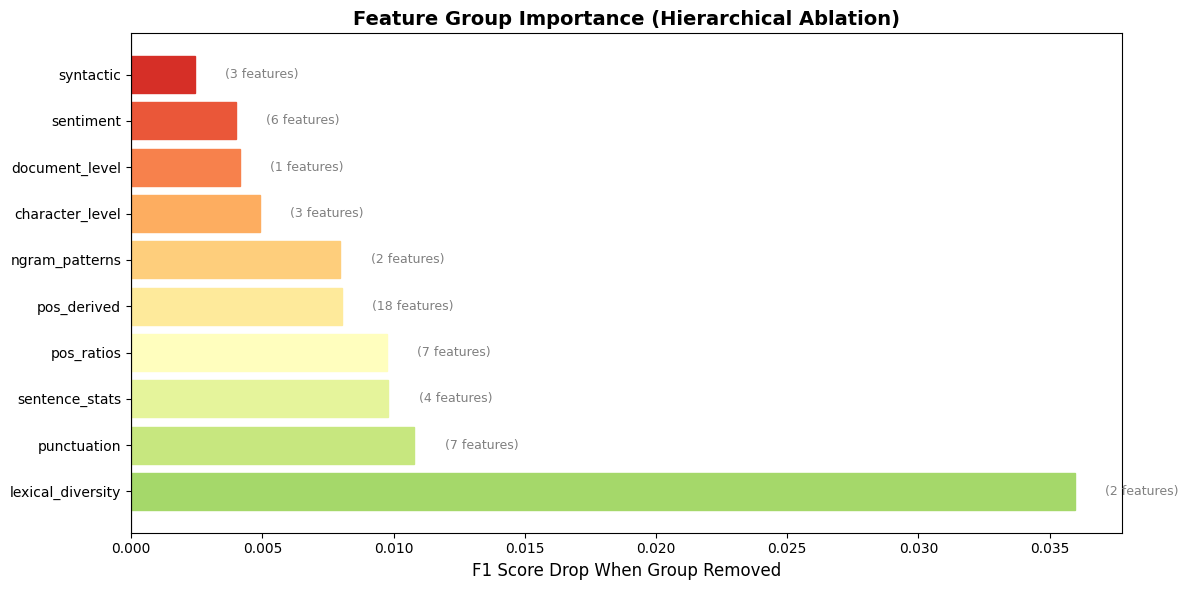

Interpretation: Larger drops indicate more important feature groups


In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

group_names = [name for name, _ in sorted_groups]
f1_drops = [metrics['f1_drop'] for _, metrics in sorted_groups]
n_features = [metrics['n_features'] for _, metrics in sorted_groups]

# Create bar plot
bars = ax.barh(group_names, f1_drops, color='steelblue')

# Color bars by importance
colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(bars)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_xlabel('F1 Score Drop When Group Removed', fontsize=12)
ax.set_title('Feature Group Importance (Hierarchical Ablation)', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Add feature count annotations
for i, (drop, n_feat) in enumerate(zip(f1_drops, n_features)):
    ax.text(drop + 0.001, i, f' ({n_feat} features)', 
            va='center', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

print("Interpretation: Larger drops indicate more important feature groups")

In [10]:
print("\n" + "="*60)
print("EXPERIMENT 2: CORRELATION ANALYSIS")
print("Identifying redundant features")
print("="*60)

# Focus on top 20 features by importance
top_20_features = feature_importances.head(20)['feature'].tolist()

print(f"\nAnalyzing correlations among top 20 features:")
print(", ".join(top_20_features))

# Compute correlation matrix
corr_matrix = X_train[top_20_features].corr()

# Find highly correlated pairs (|r| > 0.7)
redundant_pairs = []
for i in range(len(top_20_features)):
    for j in range(i+1, len(top_20_features)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) > 0.7:
            redundant_pairs.append({
                'feature1': top_20_features[i],
                'feature2': top_20_features[j],
                'correlation': corr,
                'abs_correlation': abs(corr)
            })

# Sort by absolute correlation
redundant_pairs = sorted(redundant_pairs, key=lambda x: x['abs_correlation'], reverse=True)

print(f"\nFound {len(redundant_pairs)} highly correlated pairs (|r| > 0.7):")
if redundant_pairs:
    for pair in redundant_pairs:
        print(f"  {pair['feature1']:30s} <-> {pair['feature2']:30s} | r = {pair['correlation']:6.3f}")
else:
    print("  No highly correlated pairs found (good multivariate independence!)")


EXPERIMENT 2: CORRELATION ANALYSIS
Identifying redundant features

Analyzing correlations among top 20 features:
yules_k, sentence_length_std, token_burstiness, trigram_diversity, pos_row_entropy_weighted, char_trigram_entropy, comma_ratio, n_sentences_doc, pos_ratio_NUM, punct_per_100_tok, whitespace_ratio, mean_advs_per_sent, adv_per_100_tok, content_function_ratio, prop_sents_with_verb, verbs_per_100_tok, function_to_content_rate, positive_word_ratio, uppercase_ratio, nouns_per_100_tok

Found 4 highly correlated pairs (|r| > 0.7):
  content_function_ratio         <-> nouns_per_100_tok              | r =  0.866
  yules_k                        <-> trigram_diversity              | r = -0.795
  prop_sents_with_verb           <-> function_to_content_rate       | r =  0.792
  mean_advs_per_sent             <-> adv_per_100_tok                | r =  0.783


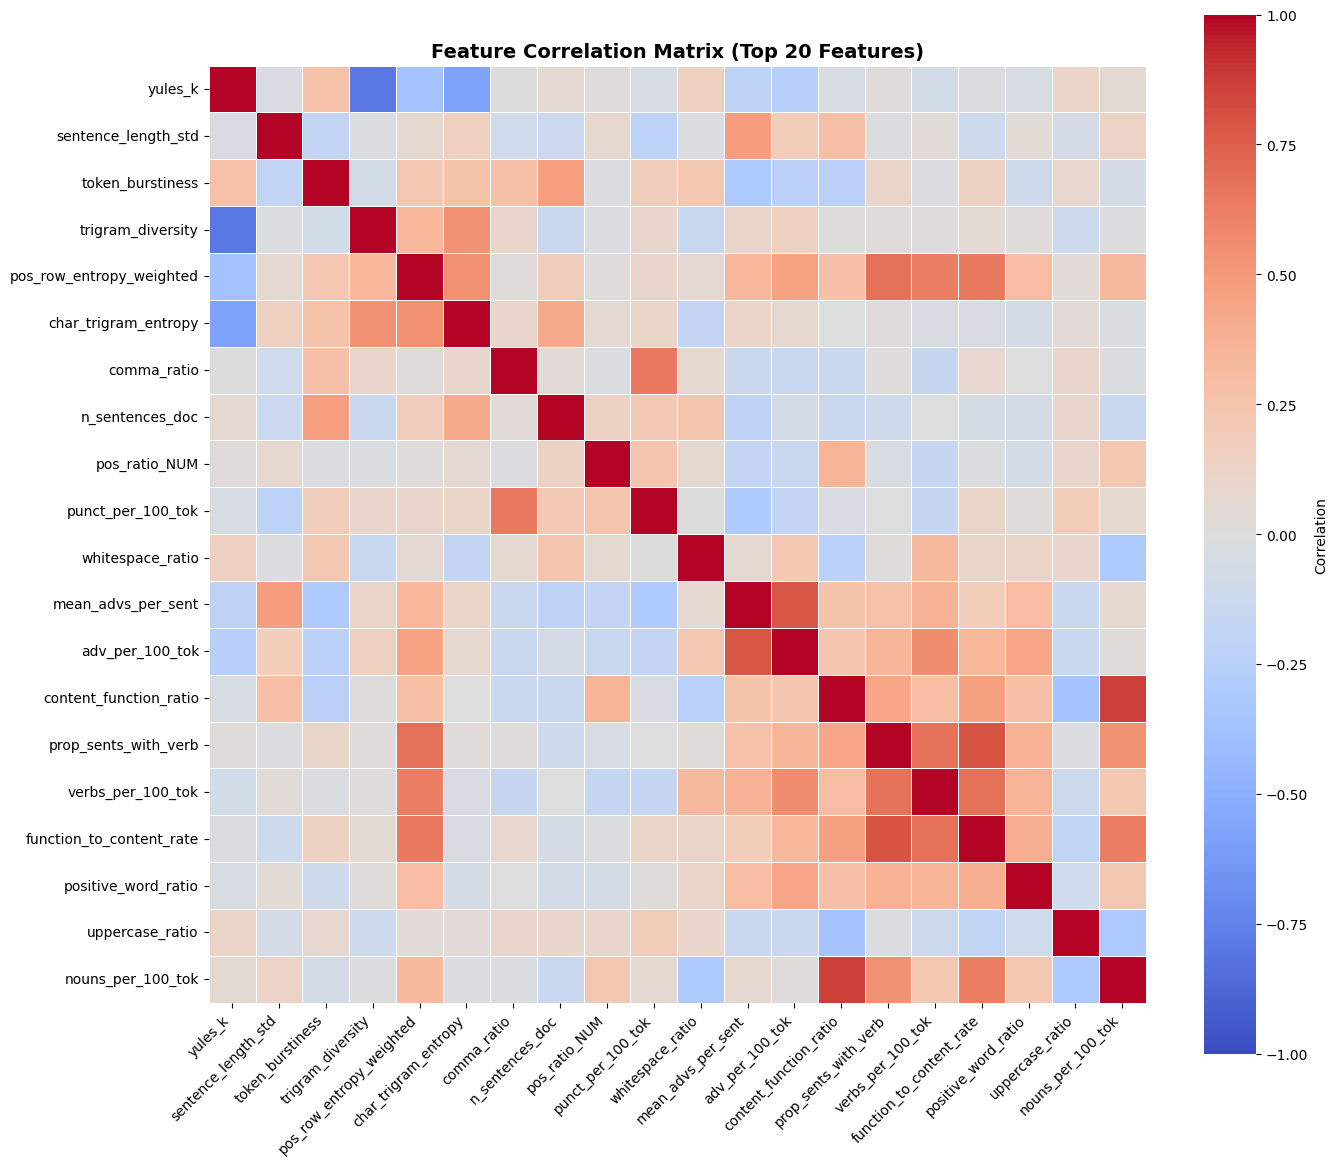

In [11]:
fig, ax = plt.subplots(figsize=(14, 12))

# Create heatmap
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'},
    ax=ax
)

ax.set_title('Feature Correlation Matrix (Top 20 Features)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [12]:
#Recursive Feature Elimination (RFE)

print("\n" + "="*60)
print("EXPERIMENT 3: RECURSIVE FEATURE ELIMINATION")
print("Finding minimal feature set")
print("="*60)

def test_single_feature_removal(feature, current_features, X_train, y_train, 
                                cv_splitter, current_f1):
    """
    Test removing a single feature (for parallel execution).
    Returns tuple: (feature, contribution)
    """
    test_features = [f for f in current_features if f != feature]
    
    # Use FAST mode for RFE iterations
    results = cross_validate_features(
        X_train, y_train,
        test_features,
        cv_splitter,
        RF_PARAMS_FAST,
        fast_mode=True  # Use faster RF params
    )
    
    contribution = current_f1 - results['f1_mean']
    return (feature, contribution)

current_features = all_features.copy()
rfe_results = []

# Starting point
rfe_results.append({
    'iteration': 0,
    'n_features': len(current_features),
    'f1_mean': baseline_f1,
    'f1_std': baseline_results['f1_std'],
    'features': current_features.copy(),
    'removed_feature': None,
    'marginal_contribution': None
})

print(f"Starting: {len(current_features)} features, F1={baseline_f1:.4f}")
print(f"Target: F1 >= {MIN_ACCEPTABLE_F1:.4f}")
print(f"Using parallel processing with {n_cores} cores")
print(f"\nBeginning RFE iterations...\n")

iteration = 1
stop_reason = None

while len(current_features) > 5:
    print(f"Iteration {iteration}: Testing {len(current_features)} features in parallel...")
    
    current_f1 = rfe_results[-1]['f1_mean']
    
    # PARALLEL feature testing (KEY OPTIMIZATION)
    results = Parallel(n_jobs=-1, verbose=0, backend='loky')(
        delayed(test_single_feature_removal)(
            feature, current_features, X_train, y_train, cv_splitter, current_f1
        )
        for feature in current_features
    )
    
    # Convert to dict
    feature_contributions = dict(results)
    
    # Find least important feature
    least_important = min(feature_contributions, key=feature_contributions.get)
    smallest_contribution = feature_contributions[least_important]
    
    print(f"  Least important: {least_important}")
    print(f"  Marginal contribution: {smallest_contribution:.4f}")
    
    # Remove it and retrain with FULL params to verify
    current_features.remove(least_important)
    new_results = cross_validate_features(
        X_train, y_train,
        current_features,
        cv_splitter,
        RF_PARAMS,  # Full params for verification
        fast_mode=False
    )
    
    print(f"  New F1: {new_results['f1_mean']:.4f} ± {new_results['f1_std']:.4f}")
    
    # Store results
    rfe_results.append({
        'iteration': iteration,
        'n_features': len(current_features),
        'f1_mean': new_results['f1_mean'],
        'f1_std': new_results['f1_std'],
        'features': current_features.copy(),
        'removed_feature': least_important,
        'marginal_contribution': smallest_contribution
    })
    
    # Check stopping criteria
    if new_results['f1_mean'] < MIN_ACCEPTABLE_F1:
        print(f"\n  STOP: F1 dropped below threshold ({MIN_ACCEPTABLE_F1:.4f})")
        stop_reason = "below_threshold"
        backbone_features = rfe_results[-2]['features']
        backbone_f1 = rfe_results[-2]['f1_mean']
        break
    
    iteration += 1
    print()

else:
    backbone_features = rfe_results[-1]['features']
    backbone_f1 = rfe_results[-1]['f1_mean']
    stop_reason = "min_features"

print("\n" + "-"*60)
print("RFE COMPLETE")
print("-"*60)
print(f"Backbone size: {len(backbone_features)} features")
print(f"Backbone F1: {backbone_f1:.4f}")
print(f"Performance retention: {(backbone_f1/baseline_f1)*100:.1f}%")
print(f"Feature reduction: {(1 - len(backbone_features)/len(all_features))*100:.1f}%")
print(f"Stop reason: {stop_reason}")


EXPERIMENT 3: RECURSIVE FEATURE ELIMINATION
Finding minimal feature set
Starting: 53 features, F1=0.8355
Target: F1 >= 0.7900
Using parallel processing with 14 cores

Beginning RFE iterations...

Iteration 1: Testing 53 features in parallel...
  Least important: adv_per_100_tok
  Marginal contribution: 0.0014
  New F1: 0.8344 ± 0.0074

Iteration 2: Testing 52 features in parallel...
  Least important: noun_verb_alternation_rate
  Marginal contribution: -0.0004
  New F1: 0.8349 ± 0.0050

Iteration 3: Testing 51 features in parallel...
  Least important: mean_advs_per_sent
  Marginal contribution: 0.0024
  New F1: 0.8339 ± 0.0074

Iteration 4: Testing 50 features in parallel...
  Least important: avg_dependency_distance
  Marginal contribution: -0.0017
  New F1: 0.8359 ± 0.0057

Iteration 5: Testing 49 features in parallel...
  Least important: question_ratio
  Marginal contribution: 0.0005
  New F1: 0.8368 ± 0.0021

Iteration 6: Testing 48 features in parallel...
  Least important: avg

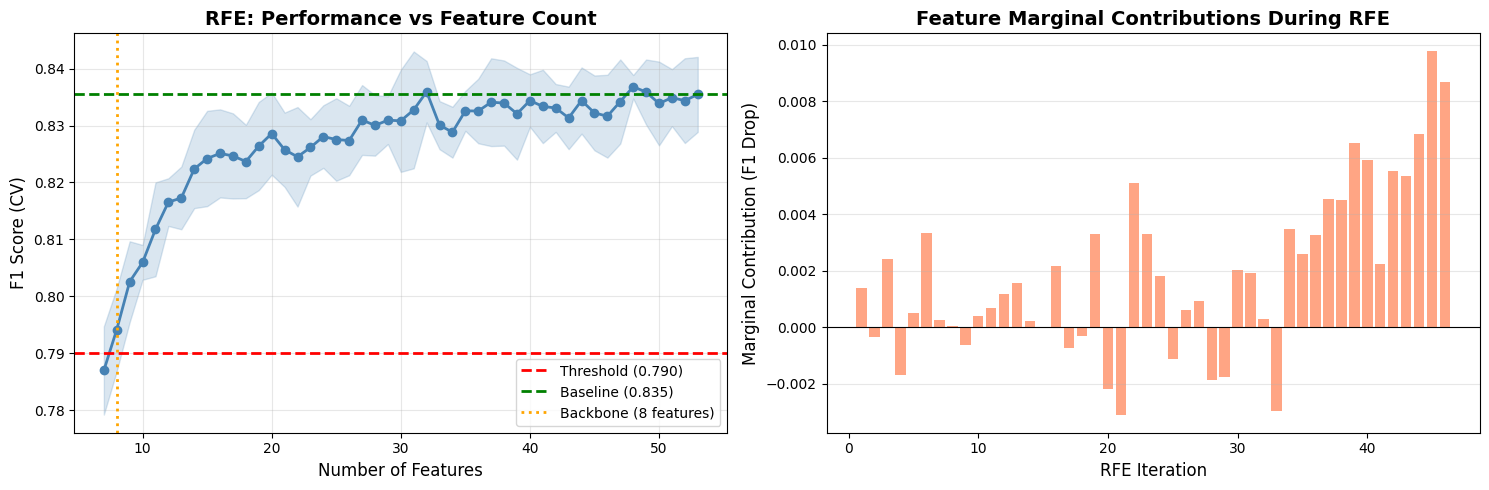

Interpretation:
- Left plot: Shows performance decay as features are removed
- Right plot: Shows importance of each removed feature


In [13]:
#RFE trajectory

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: F1 vs Number of Features
n_features_list = [r['n_features'] for r in rfe_results]
f1_means = [r['f1_mean'] for r in rfe_results]
f1_stds = [r['f1_std'] for r in rfe_results]

ax1.plot(n_features_list, f1_means, marker='o', linewidth=2, markersize=6, color='steelblue')
ax1.fill_between(
    n_features_list,
    [m - s for m, s in zip(f1_means, f1_stds)],
    [m + s for m, s in zip(f1_means, f1_stds)],
    alpha=0.2,
    color='steelblue'
)
ax1.axhline(y=MIN_ACCEPTABLE_F1, color='red', linestyle='--', linewidth=2, label=f'Threshold ({MIN_ACCEPTABLE_F1:.3f})')
ax1.axhline(y=baseline_f1, color='green', linestyle='--', linewidth=2, label=f'Baseline ({baseline_f1:.3f})')
ax1.axvline(x=len(backbone_features), color='orange', linestyle=':', linewidth=2, label=f'Backbone ({len(backbone_features)} features)')

ax1.set_xlabel('Number of Features', fontsize=12)
ax1.set_ylabel('F1 Score (CV)', fontsize=12)
ax1.set_title('RFE: Performance vs Feature Count', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Marginal Contributions
iterations = [r['iteration'] for r in rfe_results[1:]]  # Skip iteration 0
contributions = [r['marginal_contribution'] for r in rfe_results[1:]]

ax2.bar(iterations, contributions, color='coral', alpha=0.7)
ax2.set_xlabel('RFE Iteration', fontsize=12)
ax2.set_ylabel('Marginal Contribution (F1 Drop)', fontsize=12)
ax2.set_title('Feature Marginal Contributions During RFE', fontsize=14, fontweight='bold')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Interpretation:")
print("- Left plot: Shows performance decay as features are removed")
print("- Right plot: Shows importance of each removed feature")

In [14]:
#Display Backbone Features

print("\n" + "="*60)
print("BACKBONE FEATURES")
print("="*60)

# Get feature importances for backbone
rf_backbone = RandomForestClassifier(**RF_PARAMS)
rf_backbone.fit(X_train[backbone_features], y_train)

backbone_importances = pd.DataFrame({
    'feature': backbone_features,
    'importance': rf_backbone.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nBackbone contains {len(backbone_features)} features:")
print(backbone_importances.to_string(index=False))

# Categorize backbone features by group
print("\n" + "-"*60)
print("Backbone features by category:")
print("-"*60)
for group_name, group_features_list in feature_groups.items():
    backbone_in_group = [f for f in backbone_features if f in group_features_list]
    if backbone_in_group:
        print(f"\n{group_name} ({len(backbone_in_group)}/{len(group_features_list)}):")
        for feat in backbone_in_group:
            imp = backbone_importances[backbone_importances['feature']==feat]['importance'].values[0]
            print(f"  - {feat:30s} (importance: {imp:.4f})")


BACKBONE FEATURES

Backbone contains 8 features:
            feature  importance
            yules_k    0.266127
sentence_length_std    0.170574
  trigram_diversity    0.138255
  verbs_per_100_tok    0.111210
        comma_ratio    0.090072
      pos_ratio_NUM    0.086444
    n_sentences_doc    0.076467
        colon_ratio    0.060850

------------------------------------------------------------
Backbone features by category:
------------------------------------------------------------

lexical_diversity (2/2):
  - trigram_diversity              (importance: 0.1383)
  - yules_k                        (importance: 0.2661)

punctuation (2/7):
  - comma_ratio                    (importance: 0.0901)
  - colon_ratio                    (importance: 0.0609)

pos_ratios (1/7):
  - pos_ratio_NUM                  (importance: 0.0864)

pos_derived (1/18):
  - verbs_per_100_tok              (importance: 0.1112)

sentence_stats (1/4):
  - sentence_length_std            (importance: 0.1706)

docume

In [15]:
#Cumulative Feature Addition

print("\n" + "="*60)
print("EXPERIMENT 4: CUMULATIVE FEATURE ADDITION")
print("Building up from scratch to validate backbone")
print("="*60)

# Use feature importances from baseline to order features
features_by_importance = feature_importances['feature'].tolist()

cumulative_results = []
cumulative_features = []

print("\nAdding features by importance (testing every 3rd for speed)...\n")

# OPTIMIZATION: Test every 3rd feature instead of every single one
# This is fine because we're just validating the general trend
test_indices = list(range(0, len(features_by_importance), 3)) + [len(features_by_importance) - 1]

for idx in test_indices:
    # Add all features up to this index
    cumulative_features = features_by_importance[:idx+1]
    
    results = cross_validate_features(
        X_train, y_train,
        cumulative_features,
        cv_splitter,
        RF_PARAMS_FAST,  # Use fast params
        fast_mode=True
    )
    
    # Calculate improvement from previous
    if len(cumulative_results) > 0:
        improvement = results['f1_mean'] - cumulative_results[-1]['f1_mean']
    else:
        improvement = results['f1_mean']
    
    cumulative_results.append({
        'n_features': len(cumulative_features),
        'f1_mean': results['f1_mean'],
        'f1_std': results['f1_std'],
        'improvement': improvement
    })
    
    print(f"Features 1-{len(cumulative_features):2d}: F1={results['f1_mean']:.4f} "
          f"(improvement: {improvement:+.4f})")
    
    # Check for diminishing returns
    if len(cumulative_results) > 2 and improvement < 0.002:
        print(f"\nDiminishing returns detected at {len(cumulative_features)} features")
        break

print(f"\nCumulative addition complete")


EXPERIMENT 4: CUMULATIVE FEATURE ADDITION
Building up from scratch to validate backbone

Adding features by importance (testing every 3rd for speed)...

Features 1- 1: F1=0.6607 (improvement: +0.6607)
Features 1- 4: F1=0.7409 (improvement: +0.0802)
Features 1- 7: F1=0.7743 (improvement: +0.0335)
Features 1-10: F1=0.7997 (improvement: +0.0254)
Features 1-13: F1=0.8059 (improvement: +0.0062)
Features 1-16: F1=0.8131 (improvement: +0.0072)
Features 1-19: F1=0.8192 (improvement: +0.0061)
Features 1-22: F1=0.8214 (improvement: +0.0022)
Features 1-25: F1=0.8240 (improvement: +0.0026)
Features 1-28: F1=0.8254 (improvement: +0.0014)

Diminishing returns detected at 28 features

Cumulative addition complete


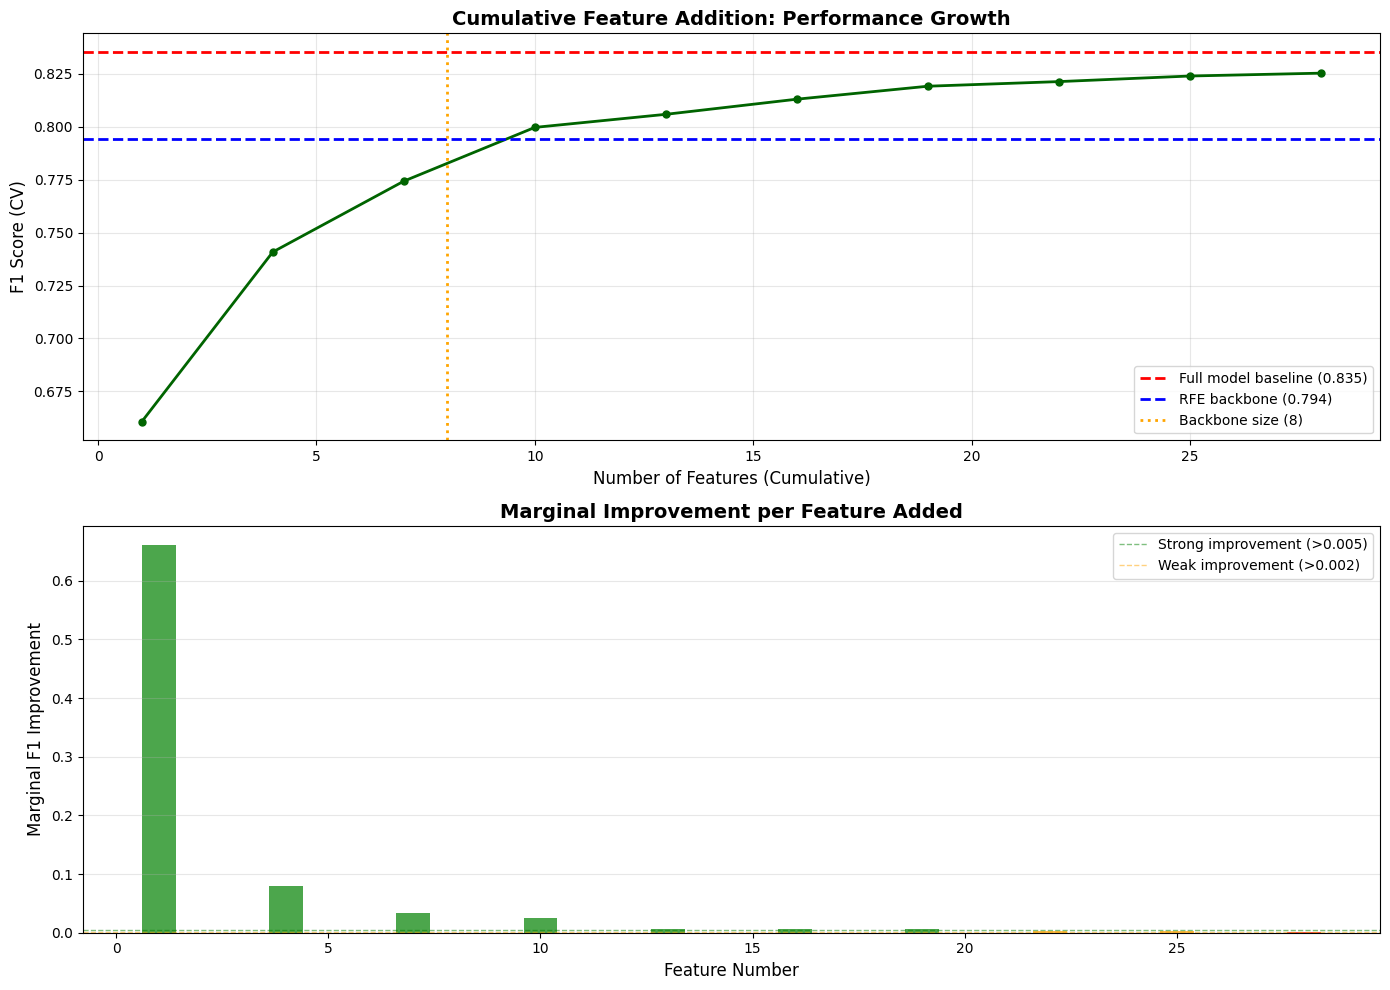

Interpretation:
- Top plot: Shows how performance grows with each feature
- Bottom plot: Shows diminishing returns - early features add more value
- Green bars = strong improvement, Orange = weak, Red = negligible


In [16]:
#Visualize Cumulative Addition

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Cumulative F1 Score
n_feats = [r['n_features'] for r in cumulative_results]
f1_vals = [r['f1_mean'] for r in cumulative_results]

ax1.plot(n_feats, f1_vals, marker='o', linewidth=2, markersize=5, color='darkgreen')
ax1.axhline(y=baseline_f1, color='red', linestyle='--', linewidth=2, label=f'Full model baseline ({baseline_f1:.3f})')
ax1.axhline(y=backbone_f1, color='blue', linestyle='--', linewidth=2, label=f'RFE backbone ({backbone_f1:.3f})')
ax1.axvline(x=len(backbone_features), color='orange', linestyle=':', linewidth=2, label=f'Backbone size ({len(backbone_features)})')

ax1.set_xlabel('Number of Features (Cumulative)', fontsize=12)
ax1.set_ylabel('F1 Score (CV)', fontsize=12)
ax1.set_title('Cumulative Feature Addition: Performance Growth', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Marginal Improvements (Bar chart)
improvements = [r['improvement'] for r in cumulative_results]

colors = ['green' if imp > 0.005 else 'orange' if imp > 0.002 else 'red' for imp in improvements]
ax2.bar(n_feats, improvements, color=colors, alpha=0.7, width=0.8)
ax2.axhline(y=0.005, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Strong improvement (>0.005)')
ax2.axhline(y=0.002, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Weak improvement (>0.002)')

ax2.set_xlabel('Feature Number', fontsize=12)
ax2.set_ylabel('Marginal F1 Improvement', fontsize=12)
ax2.set_title('Marginal Improvement per Feature Added', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Interpretation:")
print("- Top plot: Shows how performance grows with each feature")
print("- Bottom plot: Shows diminishing returns - early features add more value")
print("- Green bars = strong improvement, Orange = weak, Red = negligible")

In [17]:
#Synergy Testing 

print("\n" + "="*60)
print("EXPERIMENT 5: FEATURE SYNERGY TESTING")
print("Testing if top features interact or are independent")
print("="*60)

# Test top 5 features
top_5_features = features_by_importance[:5]

print(f"\nTesting top 5 features: {', '.join(top_5_features)}\n")

synergy_results = {}

# Individual performance
print("Individual feature performance:")
for feature in top_5_features:
    results = cross_validate_features(
        X_train, y_train,
        [feature],
        cv_splitter,
        RF_PARAMS
    )
    synergy_results[feature] = {
        'individual_f1': results['f1_mean'],
        'individual_std': results['f1_std']
    }
    print(f"  {feature:30s}: F1={results['f1_mean']:.4f} ± {results['f1_std']:.4f}")

# Test key pairwise combinations
print("\nPairwise synergy testing:")
test_pairs = [
    (top_5_features[0], top_5_features[1]),  # Top 2
    (top_5_features[0], top_5_features[2]),  # 1st + 3rd
    (top_5_features[1], top_5_features[2]),  # 2nd + 3rd
]

synergy_pairs = []

for feat1, feat2 in test_pairs:
    results = cross_validate_features(
        X_train, y_train,
        [feat1, feat2],
        cv_splitter,
        RF_PARAMS
    )
    
    # Expected if independent (simple average)
    expected_f1 = (synergy_results[feat1]['individual_f1'] + 
                   synergy_results[feat2]['individual_f1']) / 2
    
    actual_f1 = results['f1_mean']
    synergy_gain = actual_f1 - expected_f1
    
    synergy_pairs.append({
        'feature1': feat1,
        'feature2': feat2,
        'expected_f1': expected_f1,
        'actual_f1': actual_f1,
        'synergy_gain': synergy_gain
    })
    
    print(f"\n  {feat1} + {feat2}")
    print(f"    Expected F1 (if independent): {expected_f1:.4f}")
    print(f"    Actual F1:                    {actual_f1:.4f}")
    print(f"    Synergy gain:                 {synergy_gain:+.4f}")
    
    if synergy_gain > 0.05:
        print(f"    → STRONG synergy detected!")
    elif synergy_gain > 0.02:
        print(f"    → Moderate synergy")
    else:
        print(f"    → Weak/no synergy (features may be independent)")


EXPERIMENT 5: FEATURE SYNERGY TESTING
Testing if top features interact or are independent

Testing top 5 features: yules_k, sentence_length_std, token_burstiness, trigram_diversity, pos_row_entropy_weighted

Individual feature performance:
  yules_k                       : F1=0.6576 ± 0.0015
  sentence_length_std           : F1=0.5811 ± 0.0044
  token_burstiness              : F1=0.5415 ± 0.0127
  trigram_diversity             : F1=0.6125 ± 0.0387
  pos_row_entropy_weighted      : F1=0.5475 ± 0.0078

Pairwise synergy testing:

  yules_k + sentence_length_std
    Expected F1 (if independent): 0.6193
    Actual F1:                    0.7008
    Synergy gain:                 +0.0814
    → STRONG synergy detected!

  yules_k + token_burstiness
    Expected F1 (if independent): 0.5996
    Actual F1:                    0.6804
    Synergy gain:                 +0.0809
    → STRONG synergy detected!

  sentence_length_std + token_burstiness
    Expected F1 (if independent): 0.5613
    Actual 


FINAL VALIDATION: TEST SET EVALUATION

Results represent true generalization performance.

Training final models on full training set...
Models trained. Evaluating on test set...

FULL MODEL (53 features)
Test F1:      0.8344
Test ROC-AUC: 0.9267

Classification Report:
              precision    recall  f1-score   support

       Human       0.82      0.88      0.85      1200
          AI       0.87      0.80      0.83      1200

    accuracy                           0.84      2400
   macro avg       0.84      0.84      0.84      2400
weighted avg       0.84      0.84      0.84      2400


BACKBONE MODEL (8 features)
Test F1:      0.7896
Test ROC-AUC: 0.8861

Classification Report:
              precision    recall  f1-score   support

       Human       0.78      0.82      0.80      1200
          AI       0.81      0.77      0.79      1200

    accuracy                           0.80      2400
   macro avg       0.80      0.79      0.79      2400
weighted avg       0.80      0.80 

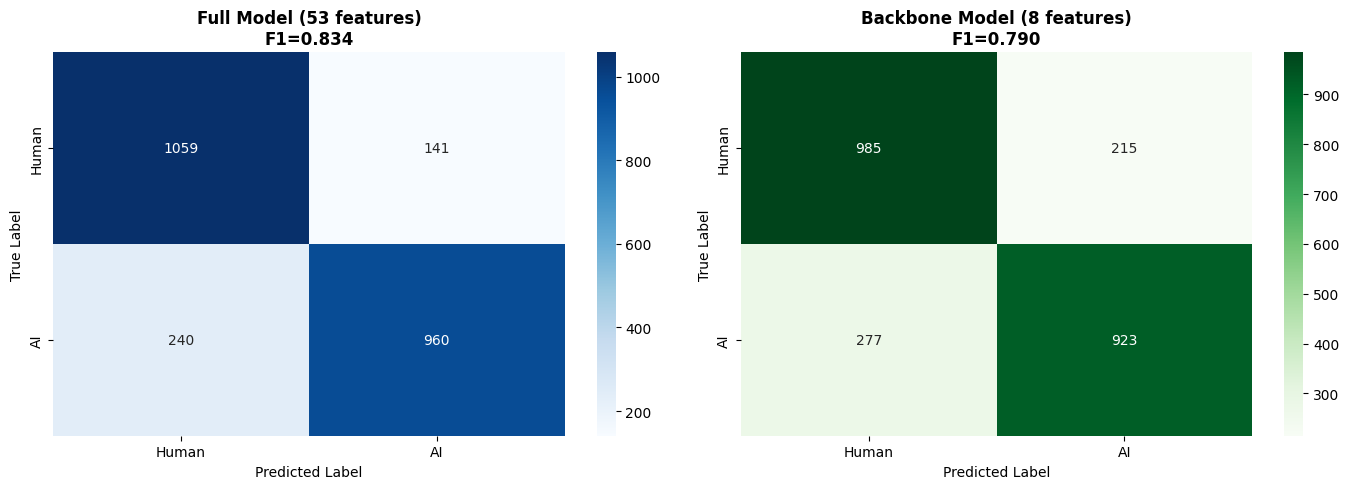

In [18]:
#Final Validation on Test Set

print("\n" + "="*60)
print("FINAL VALIDATION: TEST SET EVALUATION")
print("="*60)
print("\nWARNING: This is the FIRST TIME we're using the test set!")
print("Results represent true generalization performance.\n")

from sklearn.metrics import confusion_matrix, classification_report

# Train final models on full training set
print("Training final models on full training set...")

# Full model
rf_full = RandomForestClassifier(**RF_PARAMS)
rf_full.fit(X_train[all_features], y_train)

# Backbone model
rf_backbone_final = RandomForestClassifier(**RF_PARAMS)
rf_backbone_final.fit(X_train[backbone_features], y_train)

print("Models trained. Evaluating on test set...\n")

# Evaluate full model
y_pred_full = rf_full.predict(X_test[all_features])
y_pred_proba_full = rf_full.predict_proba(X_test[all_features])[:, 1]

test_f1_full = f1_score(y_test, y_pred_full)
test_roc_auc_full = roc_auc_score(y_test, y_pred_proba_full)

print("="*60)
print(f"FULL MODEL ({len(all_features)} features)")
print("="*60)
print(f"Test F1:      {test_f1_full:.4f}")
print(f"Test ROC-AUC: {test_roc_auc_full:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_full, target_names=['Human', 'AI']))

# Evaluate backbone model
y_pred_backbone = rf_backbone_final.predict(X_test[backbone_features])
y_pred_proba_backbone = rf_backbone_final.predict_proba(X_test[backbone_features])[:, 1]

test_f1_backbone = f1_score(y_test, y_pred_backbone)
test_roc_auc_backbone = roc_auc_score(y_test, y_pred_proba_backbone)

print("\n" + "="*60)
print(f"BACKBONE MODEL ({len(backbone_features)} features)")
print("="*60)
print(f"Test F1:      {test_f1_backbone:.4f}")
print(f"Test ROC-AUC: {test_roc_auc_backbone:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_backbone, target_names=['Human', 'AI']))

# Performance comparison
print("\n" + "="*60)
print("COMPARISON")
print("="*60)
f1_retention = (test_f1_backbone / test_f1_full) * 100
feature_reduction = (1 - len(backbone_features) / len(all_features)) * 100

print(f"Feature reduction:      {feature_reduction:.1f}%")
print(f"F1 retention:           {f1_retention:.1f}%")
print(f"F1 difference:          {test_f1_backbone - test_f1_full:+.4f}")
print(f"ROC-AUC difference:     {test_roc_auc_backbone - test_roc_auc_full:+.4f}")

# Confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

cm_full = confusion_matrix(y_test, y_pred_full)
cm_backbone = confusion_matrix(y_test, y_pred_backbone)

sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
ax1.set_title(f'Full Model ({len(all_features)} features)\nF1={test_f1_full:.3f}', fontweight='bold')
ax1.set_ylabel('True Label')
ax1.set_xlabel('Predicted Label')

sns.heatmap(cm_backbone, annot=True, fmt='d', cmap='Greens', ax=ax2,
            xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
ax2.set_title(f'Backbone Model ({len(backbone_features)} features)\nF1={test_f1_backbone:.3f}', fontweight='bold')
ax2.set_ylabel('True Label')
ax2.set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [22]:
print("\n" + "="*60)
print("SAVING ABLATION RESULTS")
print("="*60)

# Compile all results
ablation_report = {
    'metadata': {
        'date': datetime.now().isoformat(),
        'n_samples_train': len(X_train),
        'n_samples_test': len(X_test),
        'n_folds': N_FOLDS,
        'random_state': RANDOM_STATE,
        'rf_params': RF_PARAMS
    },
    
    'baseline': {
        'n_features': len(all_features),
        'features': all_features,
        'cv_f1_mean': baseline_f1,
        'cv_f1_std': baseline_results['f1_std'],
        'test_f1': test_f1_full,
        'test_roc_auc': test_roc_auc_full
    },
    
    'backbone': {
        'n_features': len(backbone_features),
        'features': backbone_features,
        'cv_f1_mean': backbone_f1,
        'test_f1': test_f1_backbone,
        'test_roc_auc': test_roc_auc_backbone,
        'feature_reduction_pct': feature_reduction,
        'f1_retention_pct': f1_retention
    },
    
    'hierarchical_ablation': {
        group: {
            'f1_drop': metrics['f1_drop'],
            'f1_drop_pct': metrics['f1_drop_pct'],
            'n_features': metrics['n_features'],
            'features': metrics['features']
        }
        for group, metrics in hierarchical_results.items()
    },
    
    'redundant_pairs': redundant_pairs,
    
    'rfe_trajectory': [
        {
            'iteration': r['iteration'],
            'n_features': r['n_features'],
            'f1_mean': r['f1_mean'],
            'removed_feature': r.get('removed_feature', None)  # Use .get() for safety
        }
        for r in rfe_results
    ],
    
    # FIXED: Handle cumulative results properly
    'cumulative_trajectory': [
        {
            'n_features': r['n_features'],
            'f1_mean': r['f1_mean'],
            'improvement': r['improvement']
        }
        for r in cumulative_results
    ]
}

# Save to JSON
output_filename = f'ablation_results_{datetime.now().strftime("%Y%m%d_%H%M%S")}.json'
with open(output_filename, 'w') as f:
    json.dump(ablation_report, f, indent=2)

print(f"\nAblation report saved to: {output_filename}")

# Also save backbone features to CSV for easy reference
backbone_df = pd.DataFrame({
    'feature': backbone_features,
    'importance': [backbone_importances[backbone_importances['feature']==f]['importance'].values[0] 
                   for f in backbone_features]
})
backbone_csv = f'backbone_features_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
backbone_df.to_csv(backbone_csv, index=False)

print(f"Backbone features saved to: {backbone_csv}")

print("\nAll results saved successfully!")


SAVING ABLATION RESULTS

Ablation report saved to: ablation_results_20251011_161511.json
Backbone features saved to: backbone_features_20251011_161511.csv

All results saved successfully!


In [23]:
#Summary Report

print("\n" + "="*70)
print(" "*20 + "ABLATION STUDY SUMMARY")
print("="*70)

print(f"\n{'Dataset:':<30s} {len(df)} samples (train: {len(X_train)}, test: {len(X_test)})")
print(f"{'Starting features:':<30s} {len(all_features)}")
print(f"{'Backbone features:':<30s} {len(backbone_features)}")
print(f"{'Feature reduction:':<30s} {feature_reduction:.1f}%")

print(f"\n{'PERFORMANCE':^70s}")
print("-"*70)
print(f"{'Metric':<30s} {'Full Model':<20s} {'Backbone':<20s}")
print("-"*70)
print(f"{'CV F1 (mean ± std)':<30s} {baseline_f1:.4f} ± {baseline_results['f1_std']:.4f}     {backbone_f1:.4f}")
print(f"{'Test F1':<30s} {test_f1_full:.4f}               {test_f1_backbone:.4f}")
print(f"{'Test ROC-AUC':<30s} {test_roc_auc_full:.4f}               {test_roc_auc_backbone:.4f}")
print(f"{'F1 Retention':<30s} {'100.0%':<20s} {f1_retention:.1f}%")

print(f"\n{'TOP 5 IMPORTANT GROUPS':^70s}")
print("-"*70)
for i, (group, metrics) in enumerate(sorted_groups[:5], 1):
    print(f"{i}. {group:<25s} F1 drop: {metrics['f1_drop']:.4f} ({metrics['n_features']} features)")

print(f"\n{'BACKBONE COMPOSITION':^70s}")
print("-"*70)
for group_name, group_features_list in feature_groups.items():
    backbone_in_group = [f for f in backbone_features if f in group_features_list]
    if backbone_in_group:
        pct = (len(backbone_in_group) / len(group_features_list)) * 100
        print(f"{group_name:<30s} {len(backbone_in_group)}/{len(group_features_list)} features ({pct:.0f}%)")

print("\n" + "="*70)


                    ABLATION STUDY SUMMARY

Dataset:                       12000 samples (train: 9600, test: 2400)
Starting features:             53
Backbone features:             8
Feature reduction:             84.9%

                             PERFORMANCE                              
----------------------------------------------------------------------
Metric                         Full Model           Backbone            
----------------------------------------------------------------------
CV F1 (mean ± std)             0.8355 ± 0.0066     0.7942
Test F1                        0.8344               0.7896
Test ROC-AUC                   0.9267               0.8861
F1 Retention                   100.0%               94.6%

                        TOP 5 IMPORTANT GROUPS                        
----------------------------------------------------------------------
1. lexical_diversity         F1 drop: 0.0360 (2 features)
2. punctuation               F1 drop: 0.0108 (7 features)


In [21]:
#Backbone Features List

print("\n" + "="*60)
print("BACKBONE FEATURES - QUICK REFERENCE")
print("="*60)
print("\nCopy-paste ready list for your code:\n")

print("backbone_features = [")
for feat in backbone_features:
    print(f"    '{feat}',")
print("]")

print(f"\n# Total: {len(backbone_features)} features")
print(f"# Performance: F1={test_f1_backbone:.4f}, ROC-AUC={test_roc_auc_backbone:.4f}")


BACKBONE FEATURES - QUICK REFERENCE

Copy-paste ready list for your code:

backbone_features = [
    'trigram_diversity',
    'yules_k',
    'comma_ratio',
    'colon_ratio',
    'pos_ratio_NUM',
    'verbs_per_100_tok',
    'sentence_length_std',
    'n_sentences_doc',
]

# Total: 8 features
# Performance: F1=0.7896, ROC-AUC=0.8861
